# Import del dataset

In [14]:
#Path file
percorso = '/content/drive/MyDrive/hateful_memes.zip'

In [23]:
#Unzip the file
import zipfile
with zipfile.ZipFile(percorso, 'r') as zip_ref:
    zip_ref.extractall('.')

In [15]:
#import json files
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = pd.read_json('/content/hateful_memes/train.jsonl',lines=True)
val = pd.read_json('/content/hateful_memes/dev_seen.jsonl',lines=True)
test = pd.read_json('/content/hateful_memes/test_seen.jsonl',lines=True)

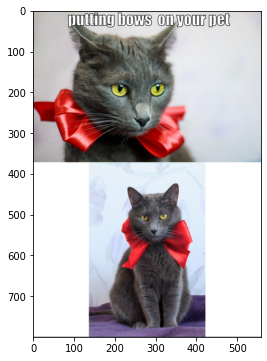

In [16]:
#Visualize dataset
path_base = '/content/hateful_memes'
plt.figure(figsize=(10,6))
img = plt.imread(path_base + '/' +train['img'][2])
plt.imshow(img)

In [17]:
#Funzione per visualizzare le immagini dato il path
def VisualizeImage(path):
  path_base = '/content/hateful_memes'
  plt.figure(figsize=(10,6))
  img = plt.imread(path_base + '/' +path)
  plt.imshow(img)

# Name Entity Recognition

In [27]:
!pip install spacy==3.0
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 459.7 MB 15 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [11]:
import spacy
print(spacy.__version__)
nlp = spacy.load("en_core_web_trf")

3.0.0


In [38]:
def NameEntityRec(text):
  
  doc = nlp(text)
  words = []

  #Niente verbi, wikidata non li riesce a gestire
  #Se si trova una soluzione scommentare  

  for token in doc:
    #if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'VERB':
    if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_== 'ADJ':
      #if token.pos_ == 'VERB':
      #  words.append(token.lemma_)
      #else:
      #  words.append(token.text)
      words.append(token.text)
  
  if not words:
    return words.append('None')
      
  return words  

In [ ]:
#Prova per vedere cosa stampa
#text = train['text'][4]
#text = 'jew mad? get fuhrerious!'
#doc = nlp(text)
#print(text)

#words = []

#for token in doc:
#  print(token, token.pos_)
#  if token.pos_ == 'VERB':
#    print(token.lemma_)
#  if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
#    words.append(token.text)

# Object Detection

In [31]:
#Installo dipendenze per Object Detection
!pip install tensorflow==2.4.0
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0
!pip install imageai --upgrade

     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 462 kB 43.0 MB/s 
     |████████████████████████████████| 3.8 MB 52.8 MB/s 
     |████████████████████████████████| 2.9 MB 56.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68709 sha256=cdb252b1c029f6cf7fe23f8344b1b74a56585e6771ad74d89ce95b75fcb7e29e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

     |████████████████████████████████| 14.9 MB 43.5 MB/s 
     |████████████████████████████████| 2.1 MB 54.5 MB/s 
     |████████████████████████████████| 26.1 MB 65.7 MB/s 
     |████████████████████████████████| 11.6 MB 57.7 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=3ebfbb2d1f56f5c8751a05522087e8c74a6335958cb30f45fe3d7390335515fd
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempt

     |████████████████████████████████| 160 kB 27.8 MB/s 


In [32]:
"""
There are 80 possible objects that you can detect with the
ObjectDetection class, and they are as seen below.

    person,   bicycle,   car,   motorcycle,   airplane,
    bus,   train,   truck,   boat,   traffic light,   fire hydrant,   stop_sign,
    parking meter,   bench,   bird,   cat,   dog,   horse,   sheep,   cow,   elephant,   bear,   zebra,
    giraffe,   backpack,   umbrella,   handbag,   tie,   suitcase,   frisbee,   skis,   snowboard,
    sports ball,   kite,   baseball bat,   baseball glove,   skateboard,   surfboard,   tennis racket,
    bottle,   wine glass,   cup,   fork,   knife,   spoon,   bowl,   banana,   apple,   sandwich,   orange,
    broccoli,   carrot,   hot dog,   pizza,   donot,   cake,   chair,   couch,   potted plant,   bed,
    dining table,   toilet,   tv,   laptop,   mouse,   remote,   keyboard,   cell phone,   microwave,
    oven,   toaster,   sink,   refrigerator,   book,   clock,   vase,   scissors,   teddy bear,   hair dryer,
    toothbrush.

To detect only some of the objects above, you will need to call the CustomObjects function and set the name of the
object(s) yiu want to detect to through. The rest are False by default. In below example, we detected only chose detect only person and dog.
"""

'\nThere are 80 possible objects that you can detect with the\nObjectDetection class, and they are as seen below.\n\n    person,   bicycle,   car,   motorcycle,   airplane,\n    bus,   train,   truck,   boat,   traffic light,   fire hydrant,   stop_sign,\n    parking meter,   bench,   bird,   cat,   dog,   horse,   sheep,   cow,   elephant,   bear,   zebra,\n    giraffe,   backpack,   umbrella,   handbag,   tie,   suitcase,   frisbee,   skis,   snowboard,\n    sports ball,   kite,   baseball bat,   baseball glove,   skateboard,   surfboard,   tennis racket,\n    bottle,   wine glass,   cup,   fork,   knife,   spoon,   bowl,   banana,   apple,   sandwich,   orange,\n    broccoli,   carrot,   hot dog,   pizza,   donot,   cake,   chair,   couch,   potted plant,   bed,\n    dining table,   toilet,   tv,   laptop,   mouse,   remote,   keyboard,   cell phone,   microwave,\n    oven,   toaster,   sink,   refrigerator,   book,   clock,   vase,   scissors,   teddy bear,   hair dryer,\n    tooth

In [18]:
#Definisco qui il modello di Object Detection
from imageai.Detection import ObjectDetection
import os

#path_drive_COCO = "/content/drive/MyDrive/resnet50_coco_best_v2.1.0.h5"
#path_drive_YOLO_tiny = "/content/drive/MyDrive/yolo-tiny.h5"
path_drive_YOLO = "/content/drive/MyDrive/yolo.h5"

#execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3() #Risulta essere veloce e mediamente accurato
#detector.setModelTypeAsRetinaNet()
#detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(path_drive_YOLO)
detector.loadModel()


In [ ]:
#Prova per vedere i risultati di probabilità
#path_img = path_base + '/' +train['img'][50]
#print(path_img)
#tags = []
#detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")

#for eachObject in detections:
#  print(eachObject)
#    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
#    tags.append(eachObject["name"])

In [19]:
#Definisco la funzione di Object Recognition
def ObjectRecognizer(path_img):
  
  detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")
  tags = []

  for eachObject in detections:
    tags.append(eachObject["name"])

  return tags #Ritorno i tags con gli elementi trovati

## Object Detection BERT

In [ ]:
#ObjectDetection con BERT pipeline
!pip install timm transformers

In [ ]:
from transformers import pipeline
obj_det = pipeline(task='object-detection',model='facebook/detr-resnet-50')
#obj_det=pipeline(task='object-detection')

In [ ]:
lista_immagini = np.array(train['img'].head(5))

In [ ]:
lista_immagini = [path_base+'/'+elem for elem in lista_immagini]

In [ ]:
lista_immagini

In [ ]:
dict_obj = obj_det(lista_immagini)

In [ ]:
dict_obj[1]

# Face Analyzer

In [9]:
!pip install deepface
from deepface import DeepFace

     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 2.3 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=c6e5eeb19c2fdee93401748ebdd870c91313082831c2e73613eab0c247ec6e80
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [20]:
#Questa funzione rileva gender, race ed emotion in un meme
def RilevazioneVolto(path):
  
  path_deepface = '/content/hateful_memes/' + path

  lista_rilevazione = []

  try:
    obj = DeepFace.analyze(img_path = path_deepface, actions = ['gender', 'race', 'emotion'], prog_bar=False)
  except:
    obj = {
        "gender" : None,
        "dominant_race"   : None,
        "dominant_emotion": None
    }
  
  lista_rilevazione=[obj['gender'],obj['dominant_race'],obj['dominant_emotion']]

  return lista_rilevazione

# Generazione Dataframe

In [66]:
path_of_images = path_base+"/img"
rows = []
n_elem_train = 20

#Versione tagliata del train per motivi di tempo
train_cut = train.head(n_elem_train)
print('Tempo stimato: ' + str(6*n_elem_train) +'s')

for i in range(len(train_cut)):
  print("Elementi rimanenti: ", (len(train_cut)-i), end='\r')
  #Effettuo Object Detection
  tags = ObjectRecognizer(path_base+'/'+train_cut['img'][i])

  #Effettuo Face Recognition se c'è una persona
  if "person" in tags:
    face_tags = RilevazioneVolto(train_cut['img'][i])
  else:
    face_tags = ['None', 'None', 'None']

  #Cerco i tags nella frase
  ner = NameEntityRec(train_cut['text'][i])

  #Creo la matrice
  rows.append([train_cut['img'][i], tags, face_tags,ner,train_cut['text'][i]])

#Genero dalla matrice il DataFrame
informazioni_ricevute = pd.DataFrame(rows,columns=['img', 'obj_tags', 'face_tags','ner', 'testo'])

Tempo stimato: 120s


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [19]:
informazioni_ricevute

,img,obj_tags,face_tags,ner,testo
0,img/42953.png,"[person, person]","[None, None, None]","[character, color]",its their character not their color that matters
1,img/23058.png,"[person, person, tie]","[None, None, None]","[afraid, ex]",don't be afraid to love again everyone is not ...
2,img/13894.png,"[cat, cat]","[None, None, None]","[bows, pet]",putting bows on your pet
3,img/37408.png,"[dog, dog]","[None, None, None]","[squirrels, squirrels]",i love everything and everybody! except for sq...
4,img/82403.png,"[person, tie]","[None, None, None]","[chocolate, chip, cookies, hitler]","everybody loves chocolate chip cookies, even h..."
5,img/16952.png,"[person, person, person, person, person]","[Man, black, neutral]","[sports, thing, points]",go sports! do the thing! win the points!
6,img/76932.png,"[dog, dog]","[None, None, None]",[right],fine you're right. now can we fucking drop it?
7,img/70914.png,[person],"[None, None, None]","[tattoos, bad, health, people, tattoos]",tattoos are bad for your health i know 5 milli...
8,img/02973.png,[dog],"[None, None, None]",[chain],how long can i run? till the chain tightens
9,img/58306.png,"[person, person, person]","[Woman, white, angry]","[tax, returns, hillary, emails, bleach, bit, h...",what is he hiding? we need to see his tax retu...


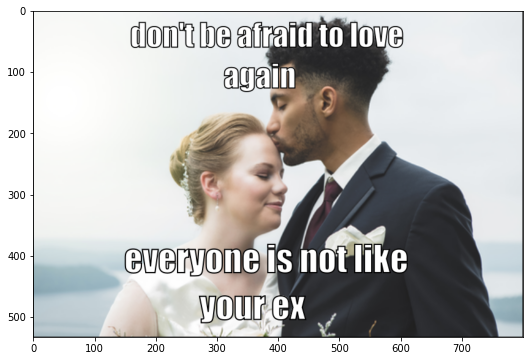

In [74]:
#Visualizzo il meme
VisualizeImage('img/23058.png')

# Wikidata

In [1]:
#Importiamo le dipendenze
import requests
import json

In [24]:
#Definiamo l'indirizzo base
API_WIKI = "https://wikidata.org/w/api.php"
n_risultati = 1

def SearchOnWiki(query):

  if 'None' in query:
    return None

  params ={
      'action': 'wbsearchentities',
      'format': 'json',
      'language': 'en',
      'limit' : n_risultati,
      'search': query
  }

  r = requests.get(API_WIKI, params=params)

  if not r.json():
    return None
  if not r.json()['search']:
    return None
  if not 'description' in r.json()['search'][0].keys():
    return None
  else:
    return r.json()

In [7]:
#Rimuove i duplicati dalla lista
def remove_duplicates(lista):
  return list(dict.fromkeys(lista))

In [50]:
#Dato un vettore di tag ritorna un DF con label e descrizione
#Viene presa solo la prima descrizione dal WikiData 
#Nel caso si vogliano ritornare più descrizioni si deve modificare n_risultati
def InformationRetrival(vettore_informazioni):
  #Rimuovo i duplicati
  if not vettore_informazioni:
    none_list = ['None', 'None', 'None'] 
    informazioni_da_wiki_pd = pd.DataFrame([none_list],columns=['label', 'description', 'source'])
    return informazioni_da_wiki_pd
  else:
    vettore_informazioni = remove_duplicates(vettore_informazioni)
  #Nuova lista di conoscenza
  informazioni_da_wiki = []

  #Devo gestire il caso in cui il vettore di informazioni
  #abbia più elementi all'interno
  if len(vettore_informazioni) > 1:
    for elem in vettore_informazioni:
      json_file = SearchOnWiki(elem)
      if not json_file:
        informazioni_da_wiki.append(['None', 'None', elem])
      else:
        informazioni_da_wiki.append([json_file['search'][0]['label'], json_file['search'][0]['description'], elem])
  #Se il vettore ha un solo elemento
  else:
    json_file = SearchOnWiki(vettore_informazioni)
    if not json_file:
      informazioni_da_wiki.append(['None', 'None', vettore_informazioni[0]])
    else:
      informazioni_da_wiki.append([json_file['search'][0]['label'], json_file['search'][0]['description'], vettore_informazioni[0]])

  #Genero un pandas dataframe
  informazioni_da_wiki_pd = pd.DataFrame(informazioni_da_wiki,columns=['label', 'description', 'source'])

  return informazioni_da_wiki_pd


# Estrazione Conoscenza

In [53]:
#tag_base  --> sono i tag estratti con NameEntityRec() dal testo dei meme
#tag_lvl_1 --> sono i tag estratti dalla descrizione dei tag_base
#tag_lvl_2 --> sono i tag estratti dalla descrizione dei tag_lvl_1

def EstrazioneConoscenza(ner_list): 
  #Crea un DF in cui abbiamo tags di conoscenza

  matrix = []
  lvl_1_know=[]
  lvl_2_know=[]
  #Mi ritorna il primo livello di conoscenza
  base_know = InformationRetrival(ner_list)

  #Secondo livello di conoscenza
  for i in range(len(base_know)):
    lvl_1_know = InformationRetrival(NameEntityRec(base_know['description'][i]))
    for j in range(len(lvl_1_know)):
      #Genero i tags finali con NER (mi fermo al secondo livello di conoscenza)
      lvl_2 = NameEntityRec(lvl_1_know['description'][j])
      lvl_2_know.append(lvl_2)
    #Inserisco gli elmenti nella matrice
    matrix.append([base_know['source'][i], list(lvl_1_know['source']), lvl_2_know])
    lvl_2_know=[]

  return pd.DataFrame(matrix, columns=['tag_base', 'tag_lvl_1', 'tag_lvl_2'])

In [64]:
#Dal DF informazioni_ricevute estraggo la conoscenza
grafo_pd = pd.DataFrame(columns=['tag_base', 'tag_lvl_1', 'tag_lvl_2'])
n_elem = 0
for i in range(len(informazioni_ricevute)):
  pd_temp = EstrazioneConoscenza(informazioni_ricevute['ner'][i])
  for j in range(len(pd_temp)):
    grafo_pd.loc[n_elem] = [pd_temp['tag_base'][j], pd_temp['tag_lvl_1'][j], pd_temp['tag_lvl_2'][j]]
    n_elem += 1

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [65]:
grafo_pd

,tag_base,tag_lvl_1,tag_lvl_2
0,character,"[fictional, human, non, -, character, narrativ...","[[narrative, form, medium, people, events, pla..."
1,color,"[visual, perception, light, wavelengths]","[[art, form, works, visual, nature], [organiza..."
2,afraid,"[single, Mötley, Crüe]","[[conceptual, representation, musical, publica..."
3,ex,"[termination, kind, organism, group, species, ...","[[termination], [kind, variety], [contiguous, ..."
4,bows,[None],[[None]]
5,pet,"[medicine, imaging, technique]","[[field, study, disease], [set, techniques, im..."
6,squirrels,"[mammal, family, common, rodent]","[[class, tetrapods], [group, people, consangui..."
7,chocolate,"[dessert, seed, Theobroma, cacao]","[[course, meal, sweet], [embryonic, plant, pro..."
8,chip,"[electronic, circuit, lithography, set, circui...","[[alternative, dance, band], [interconnection,..."
9,cookies,"[small, piece, data, website, user, computer, ...","[[American, botanist], [musical, work, art], [..."


# GraphRole
Automatic feature extraction and node role assignment for transfer learning on graphs

In [145]:
!pip install graphrole

     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 42.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import networkx as nx

In [2]:
G = nx.karate_club_graph()

In [12]:
print(G.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


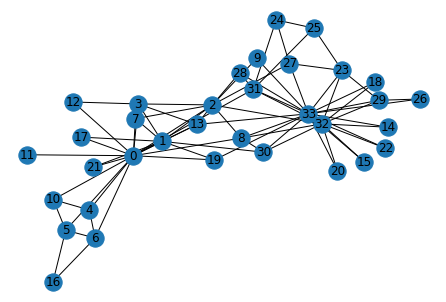

In [13]:
# plot graph
#plt.figure()


# catch matplotlib deprecation warning

nx.draw(G, with_labels=True)
    
#plt.show()

In [20]:
feature_extractor = RecursiveFeatureExtractor(G)
feature = feature_extractor.extract_features()

In [21]:
feature

,external_edges(mean)(mean),degree(mean),degree(sum),external_edges(mean),degree,external_edges,internal_edges
0,19.637500,4.312500,69.0,24.937500,16,17,34
1,22.422685,5.777778,52.0,27.666667,9,19,21
2,25.537083,6.600000,66.0,27.100000,10,34,21
3,23.717361,7.666667,46.0,25.666667,6,20,16
4,17.979167,7.666667,23.0,16.000000,3,16,5
5,17.234375,6.250000,25.0,13.000000,4,15,7
6,17.234375,6.250000,25.0,13.000000,4,15,7
7,26.342708,10.250000,41.0,22.500000,4,25,10
8,27.214363,11.800000,59.0,25.000000,5,44,10
9,28.108824,13.500000,27.0,26.000000,2,25,2


# Textual Feature Extraction

In [6]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 37.3 MB/s 
     |████████████████████████████████| 67 kB 3.5 MB/s 
     |████████████████████████████████| 3.3 MB 45.3 MB/s 
     |████████████████████████████████| 596 kB 45.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [9]:
from transformers import pipeline

In [21]:
feature_extractor = pipeline('feature-extraction')
text_feature = feature_extractor('Mila')

No model was supplied, defaulted to distilbert-base-cased (https://huggingface.co/distilbert-base-cased)
Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
print(len(text_feature[0][0]))

768


# Graph BERT

In [ ]:
!git clone 'https://github.com/jwzhanggy/Graph-Bert.git'

Cloning into 'Graph-Bert'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 442 (delta 22), reused 1 (delta 0), pack-reused 406
Receiving objects: 100% (442/442), 2.23 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (223/223), done.


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 4.3 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 895 kB 48.3 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 3.3 MB 40.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#Modify transformers.modeling_bert --> transformers.model.bert.modeling_bert
#Modify path
!python3 Graph-Bert/script_3_fine_tuning.py

************ Start ************
GrapBert, dataset: cora, residual: graph_raw, k: 7, hidden dimension: 32, hidden layer: 2, attention head: 2
Loading cora dataset...
Load WL Dictionary
Load Hop Distance Dictionary
Load Subgraph Batches
Epoch: 0001 loss_train: 1.9494 acc_train: 0.1071 loss_val: 1.7517 acc_val: 0.3500 loss_test: 1.6992 acc_test: 0.4060 time: 0.3118s
Epoch: 0011 loss_train: 0.0421 acc_train: 1.0000 loss_val: 0.7268 acc_val: 0.7800 loss_test: 0.6547 acc_test: 0.8020 time: 0.1398s
Epoch: 0021 loss_train: 0.0018 acc_train: 1.0000 loss_val: 0.7781 acc_val: 0.7833 loss_test: 0.7317 acc_test: 0.8090 time: 0.1410s
Epoch: 0031 loss_train: 0.0009 acc_train: 1.0000 loss_val: 0.8054 acc_val: 0.7867 loss_test: 0.7415 acc_test: 0.8140 time: 0.1288s
Epoch: 0041 loss_train: 0.0018 acc_train: 1.0000 loss_val: 0.7387 acc_val: 0.7967 loss_test: 0.6734 acc_test: 0.8190 time: 0.1293s
Epoch: 0051 loss_train: 0.0036 acc_train: 1.0000 loss_val: 0.7049 acc_val: 0.7733 loss_test: 0.6320 acc_test: 

# Detecting Passive-Aggressive in text (PROVA)

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
metadata_pd = pd.concat([train, val])
metadata_pd = pd.concat([metadata_pd, test])

In [ ]:
labels=metadata_pd.label
x_train,x_test,y_train,y_test=train_test_split(metadata_pd['text'], labels, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 59.5%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[829, 395],
       [415, 361]])

# Image Captioning (OSCAR?)

In [ ]:
#Scarico e installo il tool AZCOPY per scaricare da Azure
!wget https://aka.ms/downloadazcopy-v10-linux
#Estraggo il file .tar
import tarfile
my_tar = tarfile.open('/content/downloadazcopy-v10-linux')
my_tar.extractall('.') # specify which folder to extract to
my_tar.close()

--2022-01-24 14:27:40--  https://aka.ms/downloadazcopy-v10-linux
Resolving aka.ms (aka.ms)... 104.119.90.120
Connecting to aka.ms (aka.ms)|104.119.90.120|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://azcopyvnext.azureedge.net/release20211027/azcopy_linux_amd64_10.13.0.tar.gz [following]
--2022-01-24 14:27:40--  https://azcopyvnext.azureedge.net/release20211027/azcopy_linux_amd64_10.13.0.tar.gz
Resolving azcopyvnext.azureedge.net (azcopyvnext.azureedge.net)... 23.204.145.64, 23.204.145.58, 2600:1406:6c00::17cc:93c0, ...
Connecting to azcopyvnext.azureedge.net (azcopyvnext.azureedge.net)|23.204.145.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11876012 (11M) [application/gzip]
Saving to: ‘downloadazcopy-v10-linux’

downloadazcopy-v10- 100%[===================>]  11.33M  --.-KB/s    in 0.1s    

2022-01-24 14:27:40 (91.2 MB/s) - ‘downloadazcopy-v10-linux’ saved [11876012/11876012]



In [ ]:
!/content/azcopy copy 'https://biglmdiag.blob.core.windows.net/vinvl/model_ckpts/image_captioning' '/content/ImageCapModel' --recursive

INFO: Scanning...
INFO: Any empty folders will not be processed, because source and/or destination doesn't have full folder support

Job 63868e71-5312-494a-7b55-bd84d3cfdaf2 has started
Log file is located at: /root/.azcopy/63868e71-5312-494a-7b55-bd84d3cfdaf2.log

100.0 %, 134 Done, 0 Failed, 1 Pending, 0 Skipped, 135 Total,                              


Job 63868e71-5312-494a-7b55-bd84d3cfdaf2 summary
Elapsed Time (Minutes): 6.9311
Number of File Transfers: 135
Number of Folder Property Transfers: 0
Total Number of Transfers: 135
Number of Transfers Completed: 135
Number of Transfers Failed: 0
Number of Transfers Skipped: 0
TotalBytesTransferred: 20438029396
Final Job Status: Completed



In [ ]:
!pip install torch==1.2.0 torchvision==0.4.0

     |████████████████████████████████| 748.9 MB 533 bytes/s 
     |████████████████████████████████| 8.8 MB 2.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0 which is incompatible.


In [ ]:
#Installo Oscar e le dipendenze
!git clone https://github.com/microsoft/Oscar.git
%cd /content/Oscar
!git clone https://github.com/LuoweiZhou/coco-caption.git coco_caption
!git clone https://github.com/huggingface/transformers.git
#!rm -r coco_caption/

Cloning into 'Oscar'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 131 (delta 44), reused 34 (delta 34), pack-reused 58
Receiving objects: 100% (131/131), 726.16 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/Oscar
Cloning into 'coco_caption'...
remote: Enumerating objects: 790, done.
remote: Total 790 (delta 0), reused 0 (delta 0), pack-reused 790
Receiving objects: 100% (790/790), 128.16 MiB | 31.26 MiB/s, done.
Resolving deltas: 100% (455/455), done.
Cloning into 'transformers'...
remote: Enumerating objects: 97592, done.
remote: Total 97592 (delta 0), reused 0 (delta 0), pack-reused 97592
Receiving objects: 100% (97592/97592), 82.60 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (70804/70804), done.


In [ ]:
%cd ..

/content


In [ ]:
%cd /content/Oscar/coco_caption
!./get_stanford_models.sh
%cd ..
!python setup.py build develop

/content/Oscar/coco_caption
Downloading...
--2022-01-24 14:39:33--  http://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip [following]
--2022-01-24 14:39:33--  https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2015-12-09.zip [following]
--2022-01-24 14:39:33--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2015-12-09.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads

In [ ]:
# install requirements
!pip install -r requirements.txt

     |████████████████████████████████| 41 kB 479 kB/s 
     |████████████████████████████████| 131 kB 10.7 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 8.5 MB 57.1 MB/s 
     |████████████████████████████████| 127 kB 80.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
cd ..

/content


In [ ]:
#download coco dataset
#non ho abbastanza spazio
!/content/azcopy copy 'https://biglmdiag.blob.core.windows.net/oscar/datasets/coco_caption.zip' 'content/Oscar'

INFO: Scanning...
INFO: Any empty folders will not be processed, because source and/or destination doesn't have full folder support

Job a84711b3-4f5a-1640-5f8b-74b92a0c2b58 has started
Log file is located at: /root/.azcopy/a84711b3-4f5a-1640-5f8b-74b92a0c2b58.log

100.0 %, 0 Done, 0 Failed, 1 Pending, 0 Skipped, 1 Total,                              


Job a84711b3-4f5a-1640-5f8b-74b92a0c2b58 summary
Elapsed Time (Minutes): 6.5001
Number of File Transfers: 1
Number of Folder Property Transfers: 0
Total Number of Transfers: 1
Number of Transfers Completed: 1
Number of Transfers Failed: 0
Number of Transfers Skipped: 0
TotalBytesTransferred: 23943475936
Final Job Status: Completed



In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 6.9 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 33.2 MB/s 
     |████████████████████████████████| 596 kB 76.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python /content/Oscar/oscar/run_captioning.py --data_dir='/content/content/Oscar' --do_test --do_eval --test_yaml test.yaml --per_gpu_eval_batch_size 64 --num_beams 5 --max_gen_length 20 --eval_model_dir '/content/ImageCapModel/image_captioning/pretrained_large'

Traceback (most recent call last):
  File "/content/Oscar/oscar/run_captioning.py", line 22, in <module>
    from oscar.utils.cbs import ConstraintFilter, ConstraintBoxesReader
  File "/content/Oscar/oscar/utils/cbs.py", line 13, in <module>
    from oscar.modeling.modeling_utils import BeamHypotheses
  File "/content/Oscar/oscar/modeling/modeling_utils.py", line 10, in <module>
    from transformers.pytorch_transformers.modeling_bert import (BertConfig,
ModuleNotFoundError: No module named 'transformers.pytorch_transformers'


ModuleNotFoundError: ignored

# VisualBERT (Feature extractor?)
[Feature extractor example](https://colab.research.google.com/drive/1bLGxKdldwqnMVA5x4neY7-l_8fKGWQYI?usp=sharing#scrollTo=mEB4OP33IOCl)

In [ ]:
from PIL import Image

In [ ]:
image = Image.open('/content/hateful_memes/img/01269.png')

In [ ]:
from transformers.feature_extraction_utils import FeatureExtractionMixin

In [ ]:
# Assumption: *get_visual_embeddings(image)* gets the visual embeddings of the image in the batch.
from transformers import BertTokenizer, VisualBertForVisualReasoning
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = VisualBertForVisualReasoning.from_pretrained('uclanlp/visualbert-nlvr2')

text = "Who is in photo?"
inputs = tokenizer(text, return_tensors='pt')

feature_extractor = FeatureExtractionMixin.from_pretrained('uclanlp/visualbert-nlvr2')
encoding = feature_extractor(images=image, return_tensors="pt")
encoding.keys()



Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/635 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

404 Client Error: Entry Not Found for url: https://huggingface.co/uclanlp/visualbert-nlvr2/resolve/main/preprocessor_config.json


OSError: ignored

In [ ]:

visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.long)
visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.float)

inputs.update({
"visual_embeds": visual_embeds,
"visual_token_type_ids": visual_token_type_ids,
"visual_attention_mask": visual_attention_mask
})


outputs = model(**inputs)
loss = outputs.loss
scores = outputs.logits

# ViT

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 67 kB 3.2 MB/s 
     |████████████████████████████████| 596 kB 10.9 MB/s 
     |████████████████████████████████| 895 kB 58.2 MB/s 
     |████████████████████████████████| 6.8 MB 43.3 MB/s 


In [ ]:
from transformers import ViTForImageClassification
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.eval()
model.to(device)

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [ ]:
from transformers import ViTFeatureExtractor

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
encoding = feature_extractor(images=image, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values'])

In [ ]:
encoding['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [ ]:
pixel_values = encoding['pixel_values'].to(device)

outputs = model(pixel_values)
logits = outputs.logits
logits.shape

torch.Size([1, 1000])

In [ ]:
prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

Predicted class: comic book
